# Deep Learning Approach for Brain Tumor Classification

Mohamed Gamal | Nour El Hariri | Rabha Embarak | Yusuf El Kordy

#### Importing Libraries

In [1]:
import os
import itertools
from PIL import Image

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

#### Suppressing Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

# CNN Model

#### Loading Training Data

In [5]:
Training = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Training'
imgpaths = []
labels =[]
tr_dir = os.listdir(Training)

In [6]:
for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)

#### Creating DataFrames for Training Data

In [7]:
Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)


#### Setting up Testing Data Directories

In [8]:

Testing = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Training'


# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [9]:
import os

# Specify the path to your testing directory
Testing = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing'

# Get the list of subdirectories in the testing directory
ts_dir = [d for d in os.listdir(Testing) if os.path.isdir(os.path.join(Testing, d))]

# Iterate through subdirectories
for subdir in ts_dir:
    # Construct the full path to the subdirectory
    classpath = os.path.join(Testing, subdir)
    
    # Get the list of files and subdirectories in the subdirectory
    contents = os.listdir(classpath)
    
    # Iterate through files and subdirectories in the subdirectory
    for content in contents:
        content_path = os.path.join(classpath, content)
        # Your further processing code goes here


In [10]:
for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)

#### Creating Testing Data DataFrame

In [11]:

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

#### Exploring Training Data

In [12]:
Tr_data.shape

(5712, 2)

In [13]:
Tr_data.head()

Paths     Labels
0  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
1  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
2  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
3  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
4  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary

#### Exploring Testing Data


In [14]:
Ts_data.shape


(1311, 2)

In [15]:
Ts_data.head()

Paths     Labels
0  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
1  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
2  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
3  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary
4  /Users/rabhaembarak/Downloads/Brain_Tumor_MRI_...  pituitary

#### Splitting Testing Data

In [16]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


#### Setting Image Data Generators

In [17]:
batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

Tr_G = ImageDataGenerator(fill_mode='nearest')
Val_G = ImageDataGenerator()
Test_G = ImageDataGenerator()

#### Training Data Generation


In [18]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.


#### Validation Data Generation


In [19]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


#### Test Data Generation


In [20]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


#### Class Indices Mapping


In [21]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

#### Class Index Keys


In [22]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

#### Sample Training Data Visualization


In [23]:
imgs, labels = next(Train)

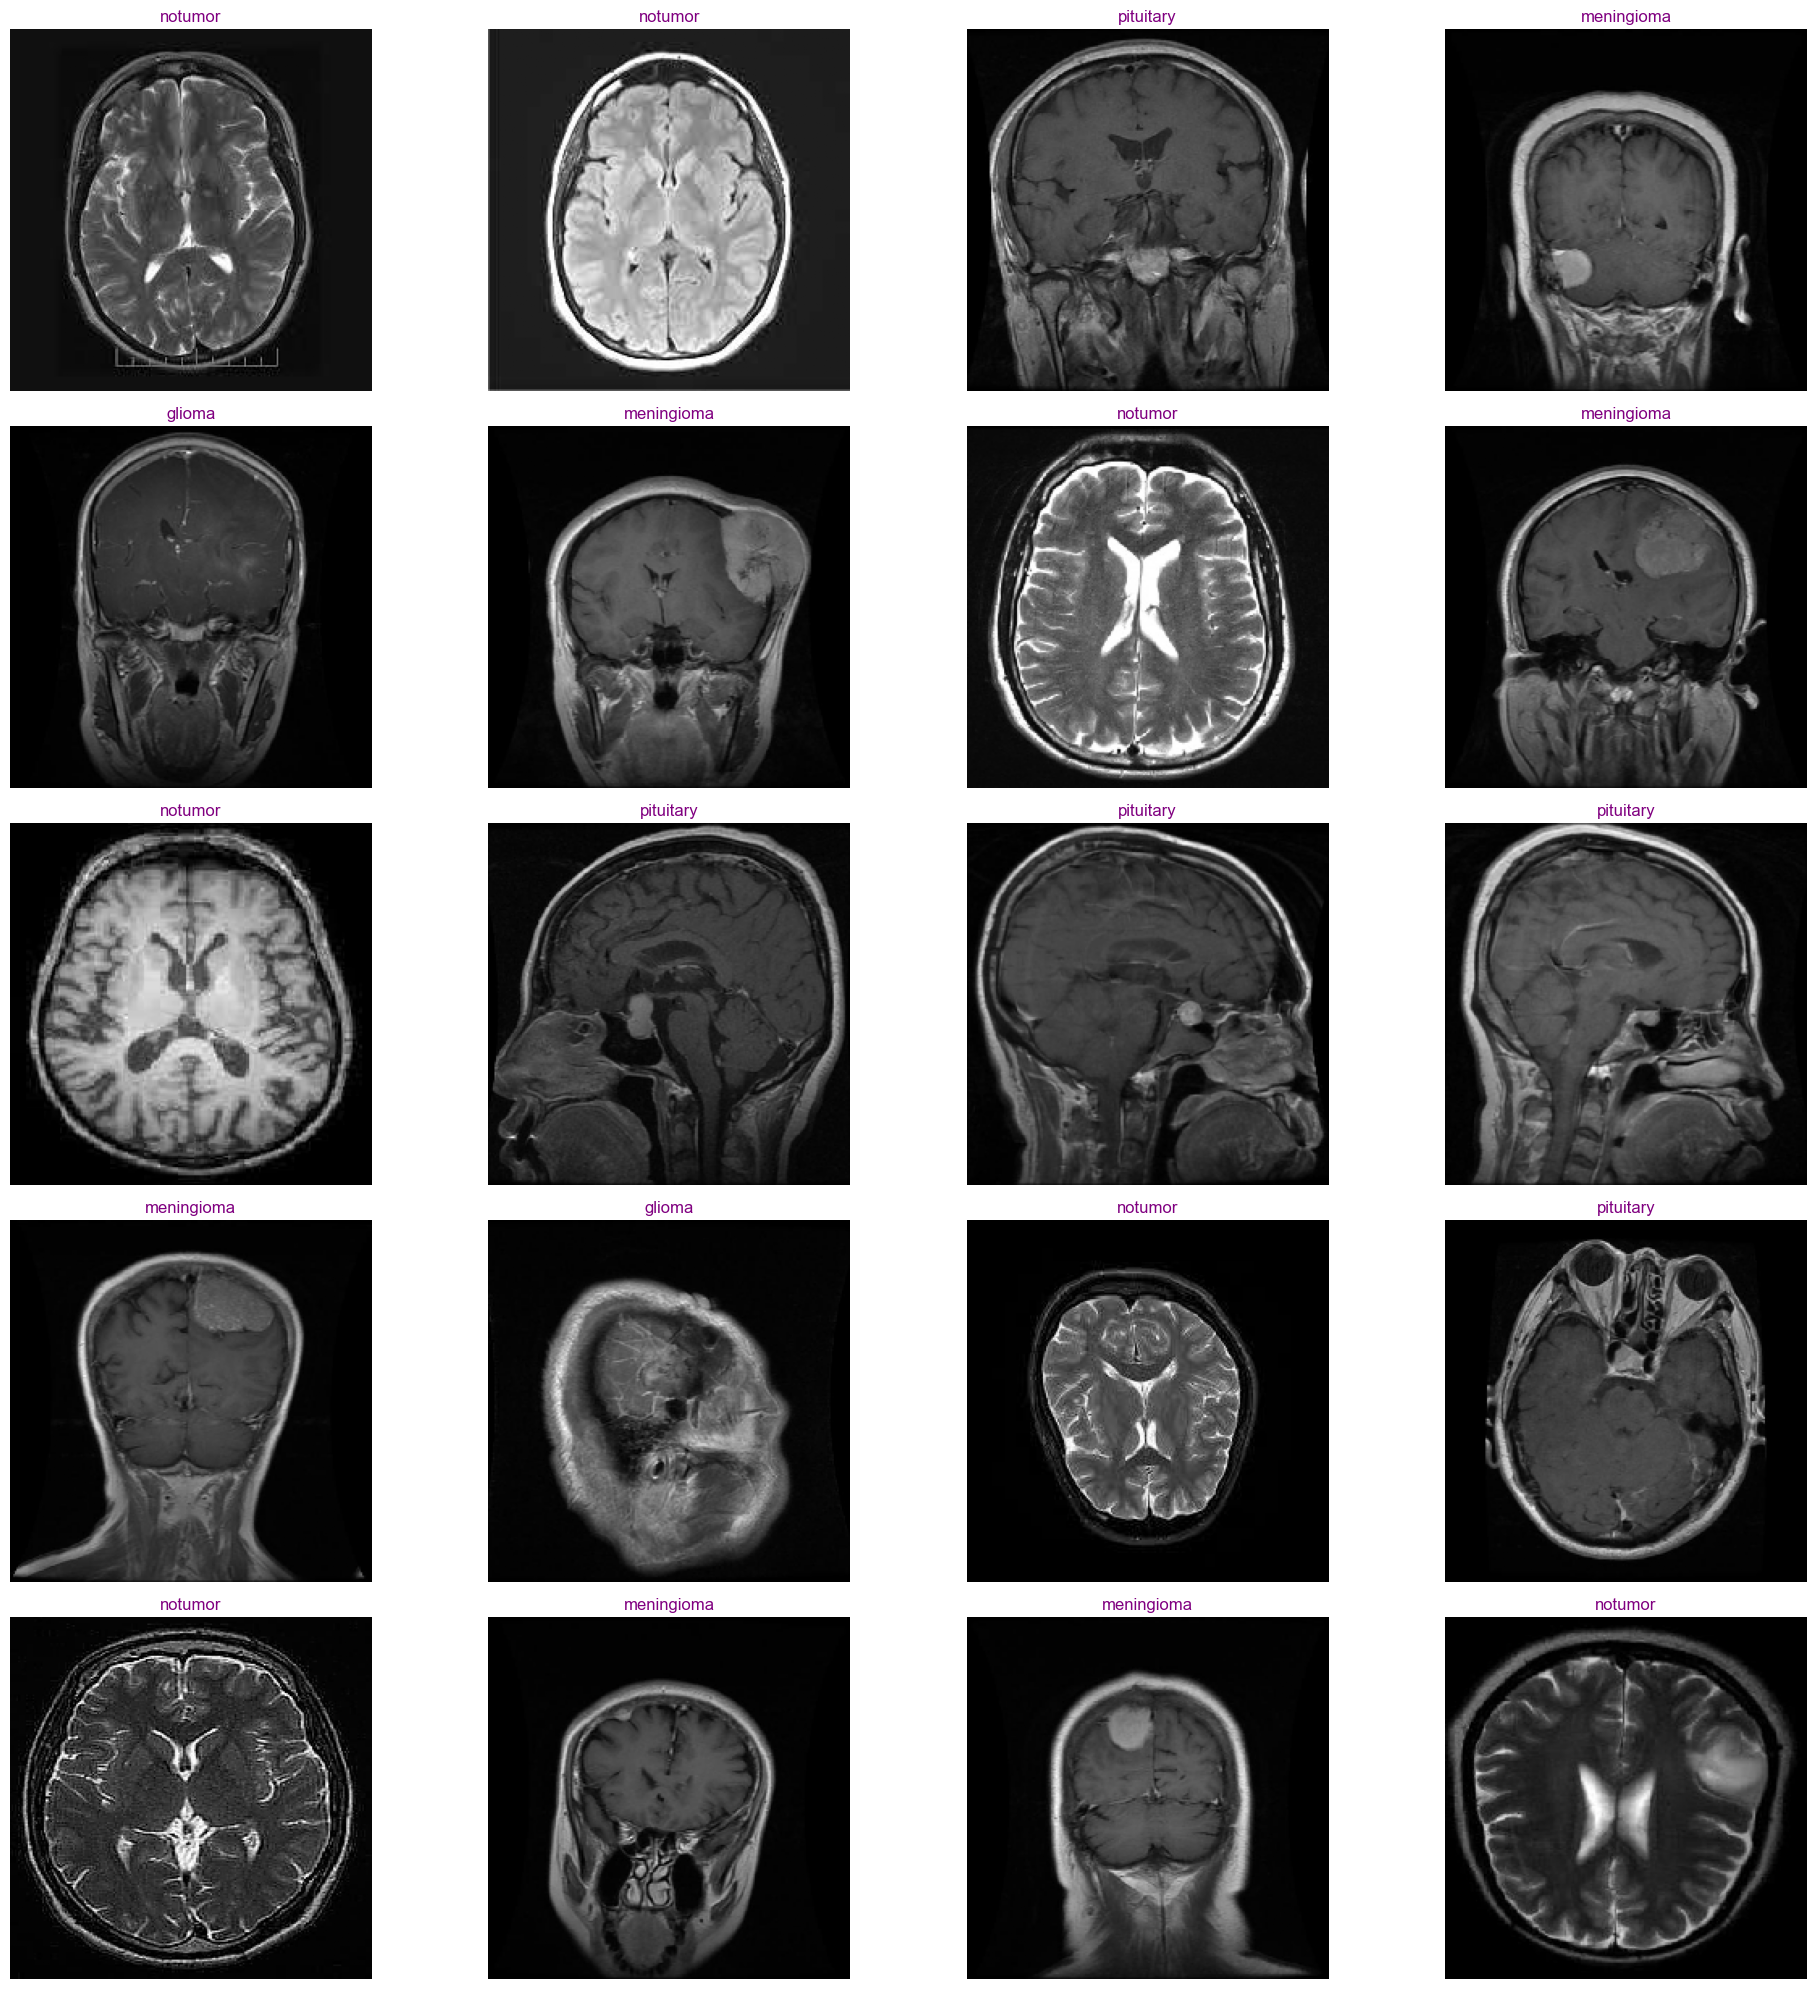

In [24]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()


#### Defining Image Parameters


In [25]:
batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [26]:
Train

#### Number of Classes


In [27]:
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

#### Convolutional Neural Network (CNN) Architecture

In [31]:
CNN = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=img_shape),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(counter_classes, activation='softmax')
])


#### Model Compilation


In [32]:
CNN.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#### Model summary


In [33]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [34]:
Train

#### Model Training


In [35]:
epochs = 15
history = CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15


2023-12-08 01:09:44.731472: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


286/286 [==============================] - 1456s 5s/step - loss: 0.9317 - accuracy: 0.7395 - val_loss: 0.4628 - val_accuracy: 0.8198
Epoch 2/15
286/286 [==============================] - 1367s 5s/step - loss: 0.3025 - accuracy: 0.8934 - val_loss: 0.2721 - val_accuracy: 0.8977
Epoch 3/15
286/286 [==============================] - 3567s 12s/step - loss: 0.1596 - accuracy: 0.9443 - val_loss: 0.2067 - val_accuracy: 0.9298
Epoch 4/15
286/286 [==============================] - 32395s 110s/step - loss: 0.0858 - accuracy: 0.9713 - val_loss: 0.3016 - val_accuracy: 0.9053
Epoch 5/15
286/286 [==============================] - 1069s 4s/step - loss: 0.0517 - accuracy: 0.9820 - val_loss: 0.1960 - val_accuracy: 0.9481
Epoch 6/15
286/286 [==============================] - 815s 3s/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.1908 - val_accuracy: 0.9511
Epoch 7/15
286/286 [==============================] - 837s 3s/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.1798 - val_accuracy: 0.9557
E

#### Training Metrics Analysis
The following code analyzes the training and validation metrics (accuracy and loss) to extract key information

In [36]:
# accuracy and loss of Train

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [48]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.7394958138465881, 0.8933823704719543, 0.944327712059021, 0.9712885022163391, 0.9819678068161011, 0.9870448112487793, 0.9901960492134094, 0.9959734082221985, 0.9933473467826843, 1.0, 0.998774528503418, 0.9947478771209717, 0.9992997050285339, 1.0, 1.0]


#### Training Metrics Visualization


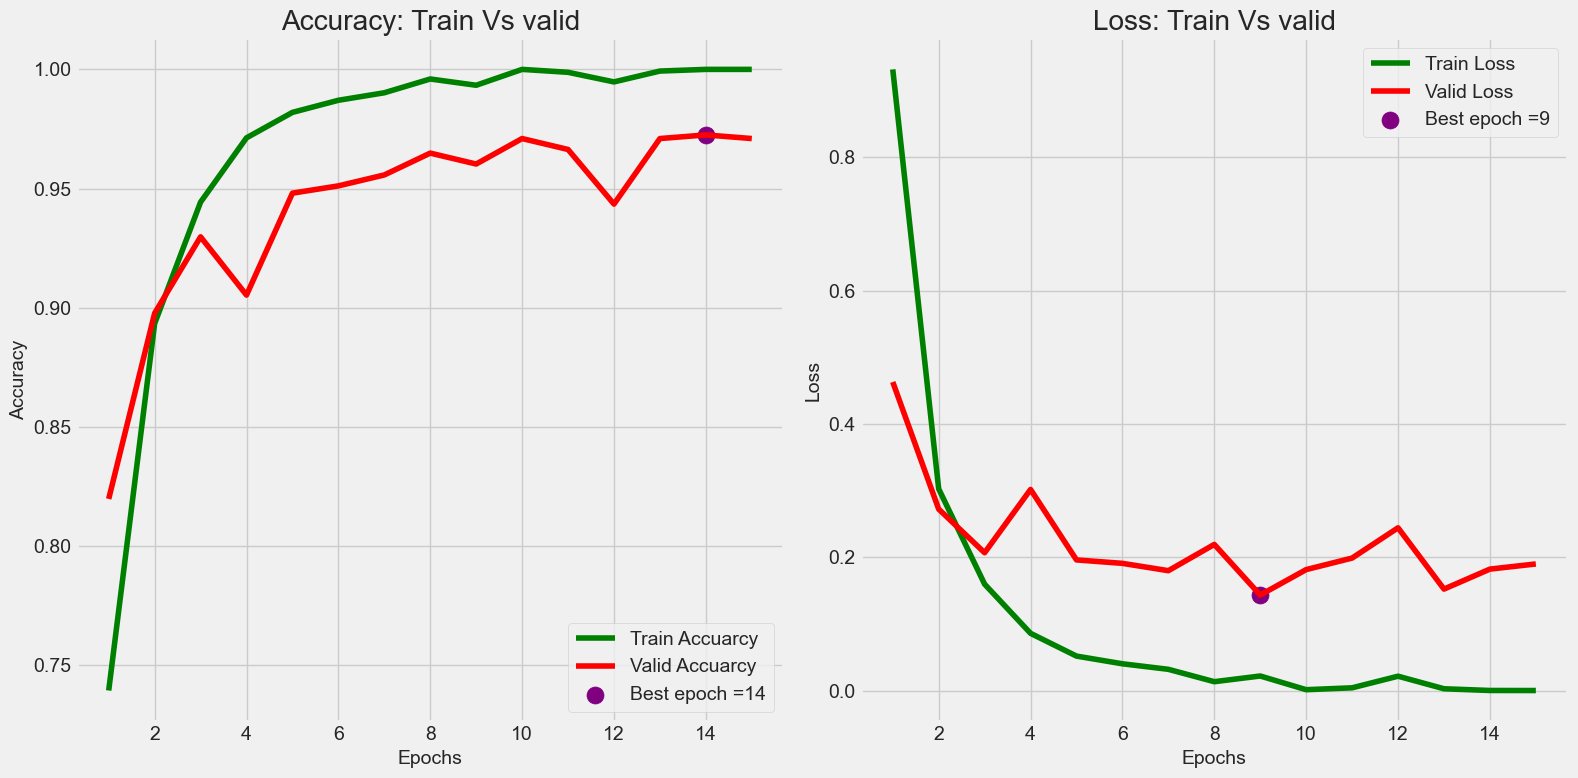

In [49]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Final Training Metrics


In [56]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('Training Accuracy:', train_acc[-1])
print('Training Loss:', train_loss[-1])

Training Accuracy: 1.0
Training Loss: 5.738182517234236e-05


#### Final Validation Metrics


In [57]:
print('Validation Accuracy:', val_acc[-1])
print('Validation Loss:', val_loss[-1])

Validation Accuracy: 0.970992386341095
Validation Loss: 0.1899198293685913


#### Test Set Evaluation


In [58]:
Test_sc =CNN.evaluate(Test, verbose = 0)

In [59]:
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Test Scores : 
    accuracy: 0.9740853905677795 
      Loss:  0.15662825107574463 
________________________


#### Prediction and Evaluation on the Test Set


In [60]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[1.20533948e-20 2.43305403e-14 1.00000000e+00 4.06492964e-24]
 [1.00000000e+00 7.68427633e-09 9.08372128e-11 1.09289077e-13]
 [2.98904511e-03 9.97010946e-01 4.40118021e-13 3.23740145e-12]
 ...
 [2.45079446e-14 9.99961734e-01 3.82515791e-05 3.33290352e-19]
 [2.12382417e-10 8.64188766e-13 2.22008809e-14 1.00000000e+00]
 [1.00000000e+00 6.76634970e-09 4.99308199e-11 3.50696294e-09]]
[2 0 1 3 2 0 0 1 2 1 1 2 0 0 0 0 2 1 1 2 1 1 3 3 1 2 3 0 3 2 3 3 2 2 0 3 1
 1 1 3 3 2 2 1 0 0 0 2 2 1 3 2 2 0 3 0 2 1 3 2 1 1 2 2 2 1 0 2 1 2 3 1 3 1
 1 3 2 2 1 0 0 2 2 2 0 3 0 3 0 2 1 3 0 3 0 0 0 1 2 2 3 2 2 1 0 2 3 0 2 2 3
 0 1 3 2 1 2 0 1 1 1 2 1 2 3 2 1 3 3 2 3 0 3 2 3 3 0 0 0 1 2 2 3 0 3 1 0 1
 1 0 3 3 0 2 2 3 2 2 2 3 3 3 2 3 0 0 1 1 3 3 3 3 1 3 3 2 3 0 1 1 1 3 3 3 0
 1 3 3 2 3 1 3 0 1 2 2 3 3 3 0 3 2 1 2 1 3 3 2 3 3 1 0 3 2 2 3 2 2 2 0 3 0
 2 2 1 2 3 1 3 0 1 0 1 2 1 2 0 3 2 2 1 2 2 3 3 0 2 0 2 2 1 2 0 0 0 0 1 3 2
 3 2 3 0 0 0 1 0 2 1 1 3 3 2 3 1 2 2 2 1 1 0 0 0 2 0 1 1 3 1 1 2 3 0 0 0 3
 1 2 0 1 1 2 0 2

#### Confusion Matrix for the Test Set


In [61]:
# Use n. of keys of  Class indices to create confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[130,   8,   0,   1],
       [  4, 146,   2,   1],
       [  1,   0, 199,   0],
       [  0,   0,   0, 164]])

#### Visualise it


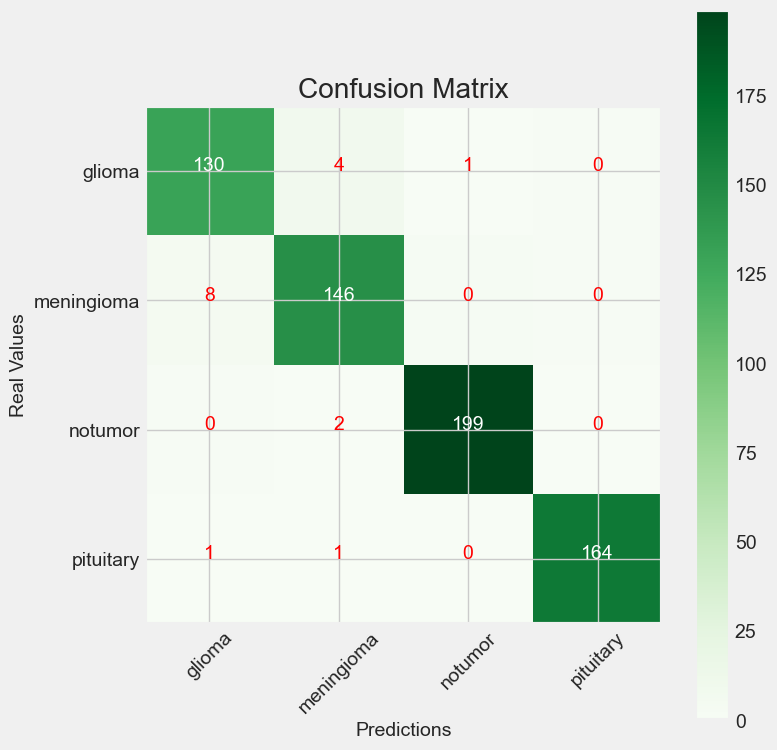

In [62]:
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

####  Calssification Report


In [63]:
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.96      0.94      0.95       139
  meningioma       0.95      0.95      0.95       153
     notumor       0.99      0.99      0.99       200
   pituitary       0.99      1.00      0.99       164

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



#### Save the Trained Convolutional Neural Network (CNN) Model

In [64]:
CNN.save('CNN.h5')

#### Loading and Compiling the Model


In [65]:
CNN = tf.keras.models.load_model("/Users/rabhaembarak/Downloads/CNN.h5", compile = False)
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

#### Image Prediction Using CNN Model

In [80]:
from PIL import Image
import tensorflow as tf
import numpy as np

# image path
path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/meningioma/Te-meTr_0001.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = CNN.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f'-------------------------\nClass whose max ratio: \n\n{cl_labels[np.argmax(p)]}')

1/1 [==============================] - 0s 60ms/step

Predictions of given image:  

 tf.Tensor([0.1748778  0.47536665 0.17487775 0.17487781], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

meningioma


#### Image Prediction Visualization


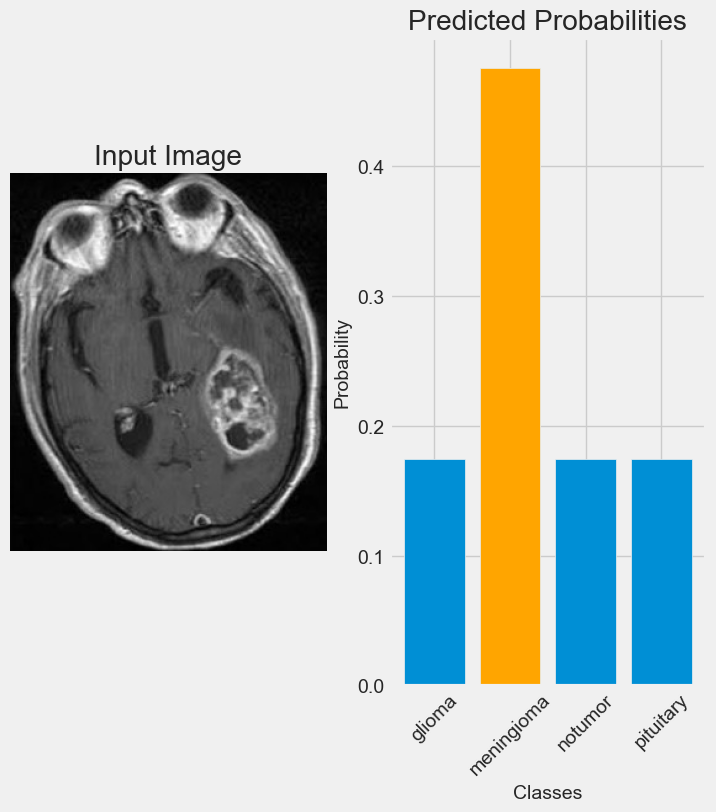

Predicted Class: meningioma


In [81]:

# Softmax and class prediction
predicted_class = np.argmax(p)

# Visualization
plt.figure(figsize=(8, 8))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities
plt.subplot(1, 2, 2)
plt.bar(cl_labels, score)
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class], color='orange')

plt.show()

# Print predicted class
print(f'Predicted Class: {cl_labels[predicted_class]}')


#### Random Image Prediction Visualization


1/1 [==============================] - 0s 58ms/step


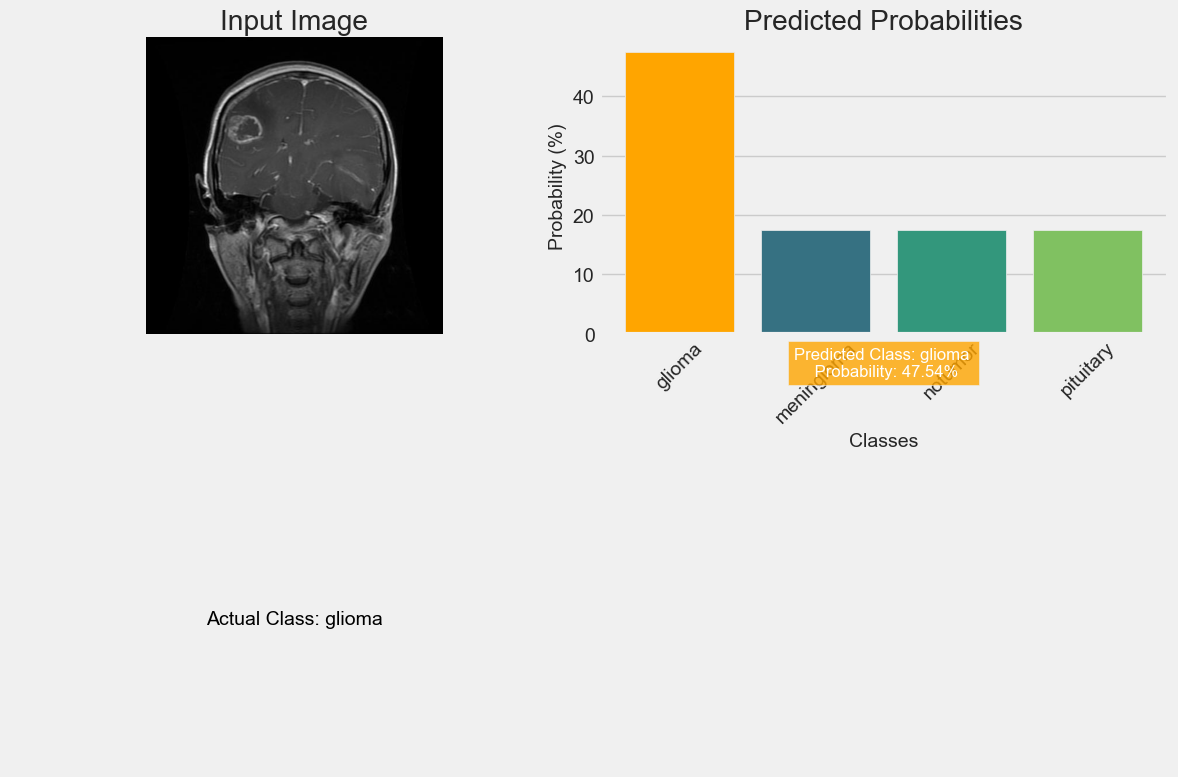

In [105]:

# Path to the "Testing" folder containing subfolders with images
testing_folder_path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/'

# Get a list of subfolders (each subfolder corresponds to a class)
subfolders = [f.path for f in os.scandir(testing_folder_path) if f.is_dir()]

# Randomly select a subfolder
random_subfolder = random.choice(subfolders)

# Get a list of image files in the selected subfolder
image_files = glob.glob(os.path.join(random_subfolder, '*.jpg'))

# Randomly select an image from the subfolder
random_image_path = random.choice(image_files)

# Open the randomly selected image
img = Image.open(random_image_path)

# Convert the image to RGB if it's not already
img = img.convert('RGB')

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = CNN.predict(iArray)

# Get class labels
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Softmax and class prediction
score = tf.nn.softmax(p[0])
predicted_class = np.argmax(p)

# Actual class (assuming you have the ground truth class label)
actual_class = os.path.basename(random_subfolder)

# Visualization
plt.figure(figsize=(12, 8))

# Display the image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities using seaborn
plt.subplot(2, 2, 2)
sns.barplot(x=cl_labels, y=score.numpy() * 100, palette="viridis")  # Convert to NumPy array and multiply by 100
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability (%)')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class].numpy() * 100, color='orange')

# Annotate the predicted class and its probability on the image
plt.text(0.5, -0.1, f'Predicted Class: {cl_labels[predicted_class]} \n Probability: {score[predicted_class].numpy()*100:.2f}%',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='white', bbox=dict(facecolor='orange', alpha=0.8))

# Display the actual class
plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, f'Actual Class: {actual_class}', ha='center', va='center', fontsize=14, color='black')
plt.axis('off')

plt.tight_layout()
plt.show()


# EfficientNetV2B0 Model

####  Data Augmentation and  EfficientNetV2B0 Model


In [117]:
IMAGE_SIZE = (224, 224)  # Adjust this based on your image size
img_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)  # Assuming 3 channels (RGB)
BASE_LR = 1e-3
model_input = tf.keras.layers.Input(shape=img_shape, name="input")
x = tf.keras.layers.RandomFlip("horizontal_and_vertical")(model_input)
x = tf.keras.layers.RandomBrightness(0.2)(x)
x = tf.keras.layers.RandomZoom(0.2, 0.2)(x)
x = tf.keras.layers.RandomTranslation(0.2, 0.2)(x)
x = tf.keras.layers.RandomRotation(0.2)(x)

# Use the EfficientNetV2B0 backbone
efficientnetv2_b0 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    input_shape=img_shape, include_top=False
)
x = efficientnetv2_b0(x)

x = tf.keras.layers.GlobalMaxPooling2D(name="max_pooling")(x)
x = tf.keras.layers.Dropout(0.2)(x)

efficientnet_output = tf.keras.layers.Dense(4, activation="softmax", name="output")(x)

# Assign the model to the variable "efficientnet"
efficientnet_model = tf.keras.Model(model_input, efficientnet_output, name="EfficientNetV2B0")


#### Summary of the EfficientNetV2B0-based model

In [118]:
efficientnet_model.summary(show_trainable=True)

Model: "EfficientNetV2B0"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input (InputLayer)          [(None, 224, 224, 3)]     0         Y          
                                                                            
 random_flip_3 (RandomFlip)  (None, 224, 224, 3)       0         Y          
                                                                            
 random_brightness_3 (Random  (None, 224, 224, 3)      0         Y          
 Brightness)                                                                
                                                                            
 random_zoom_3 (RandomZoom)  (None, 224, 224, 3)       0         Y          
                                                                            
 random_translation_3 (Rando  (None, 224, 224, 3)      0         Y          
 mTranslation)                                    

#### Freeze layers and output Model Summary

In [119]:
pretrain_model_layer = 6
efficientnet_model.layers[pretrain_model_layer].trainable = False
efficientnet_model.summary(show_trainable=True)

Model: "EfficientNetV2B0"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input (InputLayer)          [(None, 224, 224, 3)]     0         Y          
                                                                            
 random_flip_3 (RandomFlip)  (None, 224, 224, 3)       0         Y          
                                                                            
 random_brightness_3 (Random  (None, 224, 224, 3)      0         Y          
 Brightness)                                                                
                                                                            
 random_zoom_3 (RandomZoom)  (None, 224, 224, 3)       0         Y          
                                                                            
 random_translation_3 (Rando  (None, 224, 224, 3)      0         Y          
 mTranslation)                                    

In [120]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#### Compiling the EfficientNetV2B0 Model

In [121]:
efficientnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=tf.keras.optimizers.SGD(learning_rate=BASE_LR, momentum=0.9),
    metrics=["categorical_accuracy"]
)


#### Training the EfficientNetV2B0-based Model with Callbacks

In [124]:
EPOCH = 30
cbs = [
    ReduceLROnPlateau(patience=3, min_lr=1e-6),
    EarlyStopping(patience=8, restore_best_weights=True)
]

history = efficientnet_model.fit(Train,
                   epochs=EPOCH,
                   validation_data=Valid,
                   callbacks=cbs)

Epoch 1/30
286/286 [==============================] - 122s 428ms/step - loss: 2.0149 - categorical_accuracy: 0.6537 - val_loss: 1.9738 - val_categorical_accuracy: 0.7069 - lr: 0.0010
Epoch 2/30
286/286 [==============================] - 125s 439ms/step - loss: 1.8077 - categorical_accuracy: 0.6847 - val_loss: 2.3547 - val_categorical_accuracy: 0.6183 - lr: 0.0010
Epoch 3/30
286/286 [==============================] - 124s 434ms/step - loss: 1.7303 - categorical_accuracy: 0.6843 - val_loss: 1.5864 - val_categorical_accuracy: 0.7481 - lr: 0.0010
Epoch 4/30
286/286 [==============================] - 126s 439ms/step - loss: 1.8742 - categorical_accuracy: 0.6861 - val_loss: 2.3159 - val_categorical_accuracy: 0.6000 - lr: 0.0010
Epoch 5/30
286/286 [==============================] - 129s 451ms/step - loss: 1.6399 - categorical_accuracy: 0.7076 - val_loss: 1.1640 - val_categorical_accuracy: 0.7954 - lr: 0.0010
Epoch 6/30
286/286 [==============================] - 127s 444ms/step - loss: 1.8149 

#### Fine-tuning EfficientNetV2B0 Model

In [127]:
fine_tune_at = 100
pretrain_model = efficientnet_model.layers[pretrain_model_layer]
pretrain_model.trainable = True
for layer in pretrain_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in pretrain_model.layers:    
    print(layer.name, layer.output.shape, layer.trainable)

input_4 (None, 224, 224, 3) False
rescaling_3 (None, 224, 224, 3) False
normalization_3 (None, 224, 224, 3) False
stem_conv (None, 112, 112, 32) False
stem_bn (None, 112, 112, 32) False
stem_activation (None, 112, 112, 32) False
block1a_project_conv (None, 112, 112, 16) False
block1a_project_bn (None, 112, 112, 16) False
block1a_project_activation (None, 112, 112, 16) False
block2a_expand_conv (None, 56, 56, 64) False
block2a_expand_bn (None, 56, 56, 64) False
block2a_expand_activation (None, 56, 56, 64) False
block2a_project_conv (None, 56, 56, 32) False
block2a_project_bn (None, 56, 56, 32) False
block2b_expand_conv (None, 56, 56, 128) False
block2b_expand_bn (None, 56, 56, 128) False
block2b_expand_activation (None, 56, 56, 128) False
block2b_project_conv (None, 56, 56, 32) False
block2b_project_bn (None, 56, 56, 32) False
block2b_drop (None, 56, 56, 32) False
block2b_add (None, 56, 56, 32) False
block3a_expand_conv (None, 28, 28, 128) False
block3a_expand_bn (None, 28, 28, 128) Fal

#### Compile Fine-tuned EfficientNetV2B0 Model

In [128]:
efficientnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=tf.keras.optimizers.SGD(learning_rate=BASE_LR/10, momentum=0.9),
    metrics=["categorical_accuracy"]
)



In [129]:
last_epoch = history.epoch[-1]

history_fine = efficientnet_model.fit(Train,
                           epochs=last_epoch+100,
                           initial_epoch=last_epoch,
                           validation_data=Valid,
                           callbacks=cbs)

Epoch 29/128
286/286 [==============================] - 153s 517ms/step - loss: 1.5509 - categorical_accuracy: 0.6791 - val_loss: 1.2905 - val_categorical_accuracy: 0.7542 - lr: 1.0000e-04
Epoch 30/128
286/286 [==============================] - 150s 526ms/step - loss: 1.2309 - categorical_accuracy: 0.7456 - val_loss: 1.1886 - val_categorical_accuracy: 0.7710 - lr: 1.0000e-04
Epoch 31/128
286/286 [==============================] - 154s 537ms/step - loss: 1.1371 - categorical_accuracy: 0.7553 - val_loss: 1.0123 - val_categorical_accuracy: 0.7908 - lr: 1.0000e-04
Epoch 32/128
286/286 [==============================] - 155s 543ms/step - loss: 1.0193 - categorical_accuracy: 0.7686 - val_loss: 0.7847 - val_categorical_accuracy: 0.8656 - lr: 1.0000e-04
Epoch 33/128
286/286 [==============================] - 156s 544ms/step - loss: 0.9506 - categorical_accuracy: 0.7845 - val_loss: 0.8688 - val_categorical_accuracy: 0.8198 - lr: 1.0000e-04
Epoch 34/128
286/286 [==============================] -

#### Model  Evaluation Metrics

In [136]:
# accuracy and loss of Train

tr_acc = history_fine.history['categorical_accuracy']
tr_loss = history_fine.history['loss']


# accuracy and loss or Valid\

v_acc = history_fine.history['val_categorical_accuracy']
v_loss = history_fine.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

#### Training Metrics (Epochs and Training Accuracy)


In [137]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.6790966391563416, 0.7456232309341431, 0.7552521228790283, 0.7685574293136597, 0.7844887971878052, 0.793067216873169, 0.8032212853431702, 0.8135504126548767, 0.8144257664680481, 0.8226540684700012, 0.8212534785270691, 0.8328081369400024, 0.8216036558151245, 0.8098739385604858, 0.8200280070304871, 0.8147758841514587, 0.8167017102241516, 0.8198529481887817, 0.825630247592926, 0.8221288323402405, 0.8207283020019531, 0.8277310729026794, 0.8326330780982971, 0.825630247592926, 0.8216036558151245, 0.82492995262146, 0.8266806602478027]


####  Training Metrics Visualization (Epochs, Training Accuracy, and Loss)


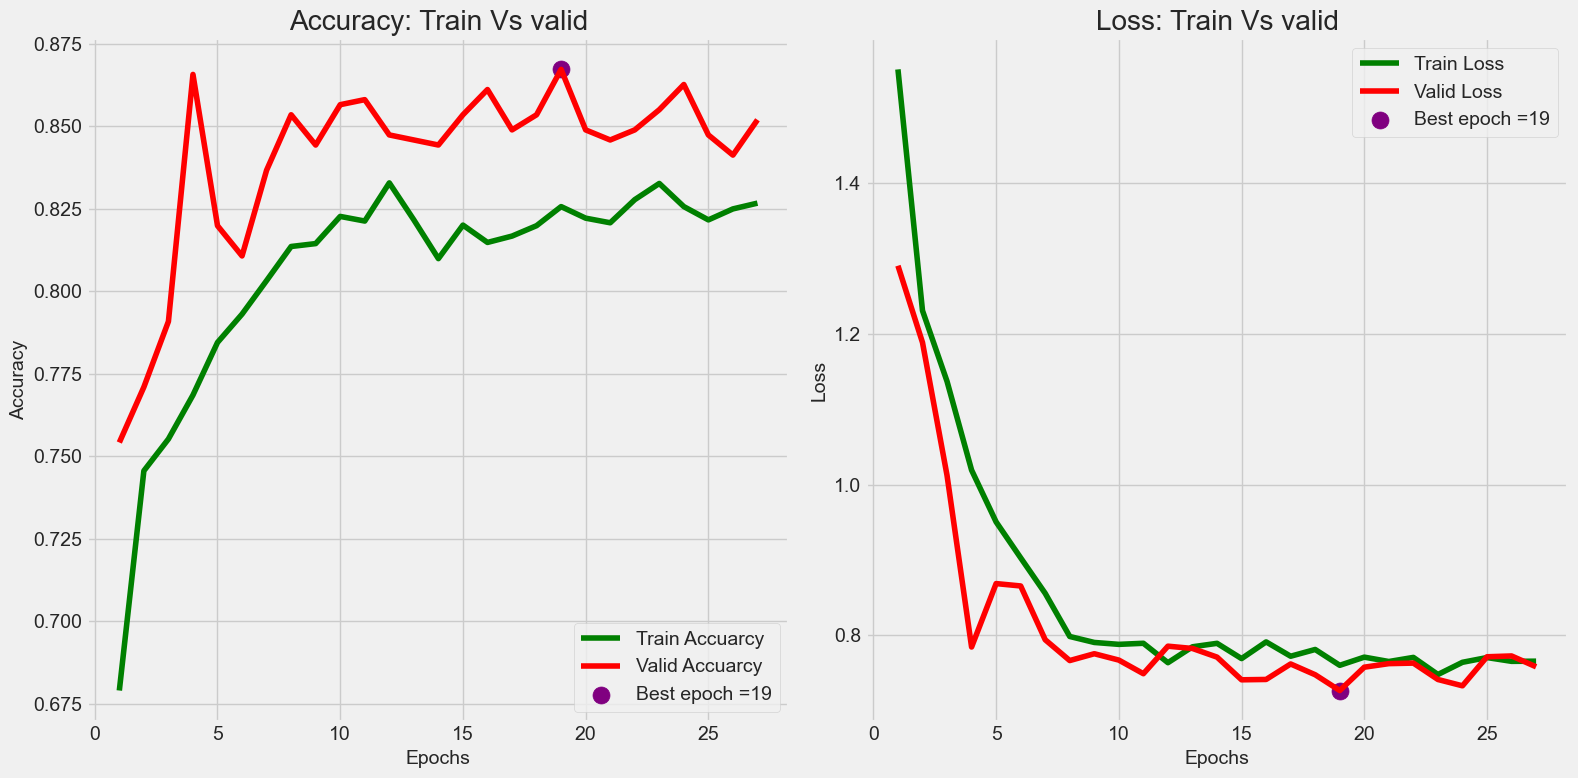

In [138]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Training Metrics Summary

In [142]:
train_acc = history_fine.history['categorical_accuracy']
val_acc = history_fine.history['val_categorical_accuracy']
train_loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
print('Training Accuracy:', train_acc[-1])
print('Training Loss:', train_loss[-1])

Training Accuracy: 0.8266806602478027
Training Loss: 0.7658815979957581


#### Validation Metrics Summary

In [143]:
print('Validation Accuracy:', val_acc[-1])
print('Validation Loss:', val_loss[-1])

Validation Accuracy: 0.8519083857536316
Validation Loss: 0.7584598660469055


#### Final Testing Metrics Summary


In [144]:
Test_sc =efficientnet_model.evaluate(Test, verbose = 0)

In [145]:
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Test Scores : 
    accuracy: 0.8216463327407837 
      Loss:  0.7578656673431396 
________________________


#### Test Set Predictions Summary

In [146]:
predictions = efficientnet_model.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[2.53611919e-03 6.57334505e-03 8.86702478e-01 1.04187995e-01]
 [3.12515885e-01 1.37423798e-02 5.71098411e-03 6.68030798e-01]
 [1.22686438e-02 9.85025704e-01 1.87596679e-03 8.29707773e-04]
 ...
 [1.00975081e-01 1.53167188e-01 7.34091520e-01 1.17661711e-02]
 [2.91044801e-01 3.33051756e-02 3.76982689e-02 6.37951791e-01]
 [9.09746408e-01 3.53440717e-02 2.74128485e-02 2.74966601e-02]]
[2 3 1 3 2 0 0 1 2 3 1 2 0 0 3 0 2 1 1 2 2 3 3 3 3 3 3 0 3 2 3 3 2 2 0 3 3
 0 3 3 3 2 2 1 0 3 0 2 2 2 3 2 2 0 3 3 2 3 3 2 0 2 2 2 2 2 0 2 1 2 3 1 3 1
 1 3 2 2 1 0 0 2 2 2 0 3 0 3 0 2 3 3 0 3 0 0 0 2 2 2 3 2 2 1 0 2 3 0 2 2 3
 0 1 3 2 1 3 3 1 0 3 2 0 2 3 2 1 1 3 2 3 0 3 2 0 3 1 0 0 1 2 2 3 0 3 3 0 3
 0 0 3 3 0 2 2 3 2 2 2 3 1 3 2 3 0 0 0 2 3 3 3 3 1 3 0 2 3 3 1 3 1 3 3 3 0
 1 3 3 2 3 1 3 3 1 2 2 3 3 3 0 3 1 1 2 1 3 3 2 3 3 2 0 3 2 2 3 2 3 2 1 3 0
 2 2 3 2 3 3 0 0 1 3 3 2 2 2 0 3 2 2 1 2 2 3 3 0 0 0 2 2 1 2 0 0 0 0 1 3 2
 3 2 3 1 0 0 3 0 2 3 1 3 3 0 3 1 2 2 2 3 1 0 0 0 2 1 3 1 3 3 1 2 3 0 0 2 0
 3 2 0 1 1 2 0 2

#### Confusion Matrix for EfficientNetV2B0 Model on Test Set

In [147]:
# Use n. of keys of  Class indices to create confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[106,  10,   3,  20],
       [ 12,  84,  16,  41],
       [  3,   2, 190,   5],
       [  4,   1,   0, 159]])

#### Visualise it


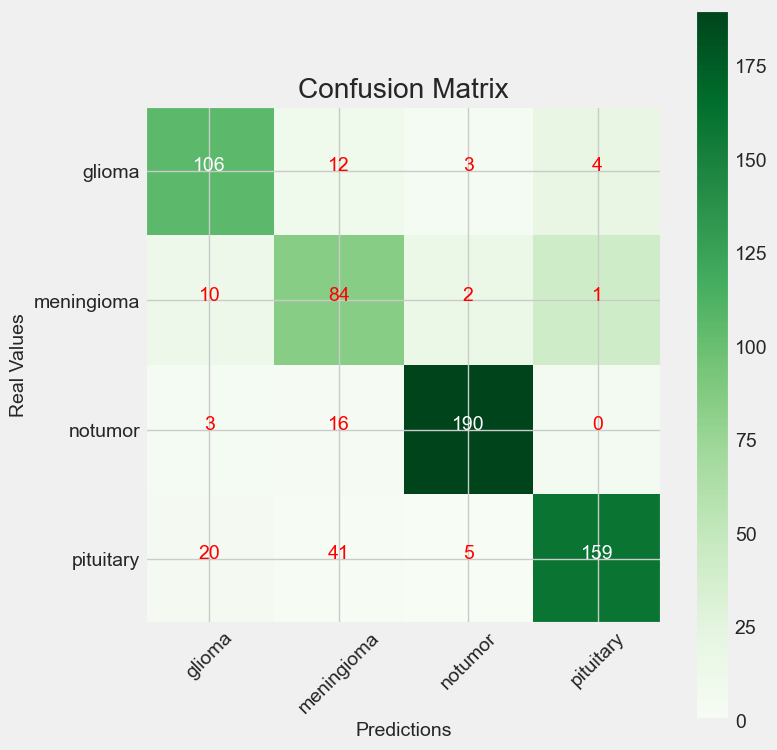

In [148]:
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

#### Classification Report for EfficientNetV2B0 Model on Test Set

In [149]:
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.85      0.76      0.80       139
  meningioma       0.87      0.55      0.67       153
     notumor       0.91      0.95      0.93       200
   pituitary       0.71      0.97      0.82       164

    accuracy                           0.82       656
   macro avg       0.83      0.81      0.81       656
weighted avg       0.84      0.82      0.81       656



#### Save EfficientNet Model 

In [150]:
efficientnet_model.save('efficientnet_model.h5')

#### Load EfficientNet Model from File and Compile

In [151]:
efficientnet_model = tf.keras.models.load_model("/Users/rabhaembarak/Downloads/efficientnet_model.h5", compile = False)
efficientnet_model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

#### Load Image, Preprocess, and Make Predictions with EfficientNet Model

In [152]:
from PIL import Image
import tensorflow as tf
import numpy as np

# image path
path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/meningioma/Te-meTr_0001.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = efficientnet_model.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f'-------------------------\nClass whose max ratio: \n\n{cl_labels[np.argmax(p)]}')

1/1 [==============================] - 1s 617ms/step

Predictions of given image:  

 tf.Tensor([0.36868548 0.23781213 0.19272342 0.20077893], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

glioma


#### Visualize Predictions for a Brain Tumor Image using EfficientNet Model

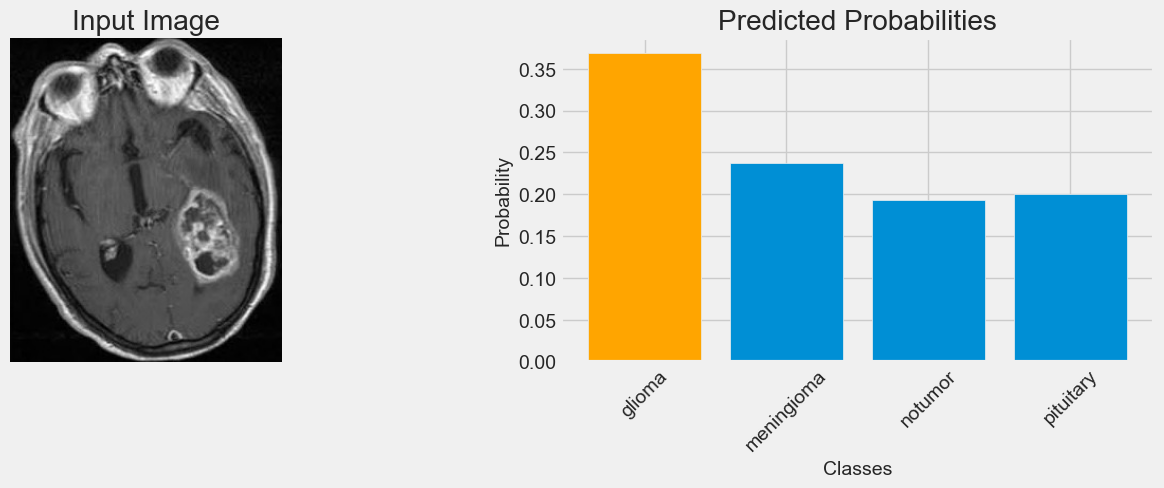

Predicted Class: glioma


In [156]:

# Softmax and class prediction
predicted_class = np.argmax(p)

# Visualization
plt.figure(figsize=(15, 4))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities
plt.subplot(1, 2, 2)
plt.bar(cl_labels, score)
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class], color='orange')

plt.show()

# Print predicted class
print(f'Predicted Class: {cl_labels[predicted_class]}')


#### Random Image Prediction and Visualization with EfficientNet Model

1/1 [==============================] - 0s 30ms/step


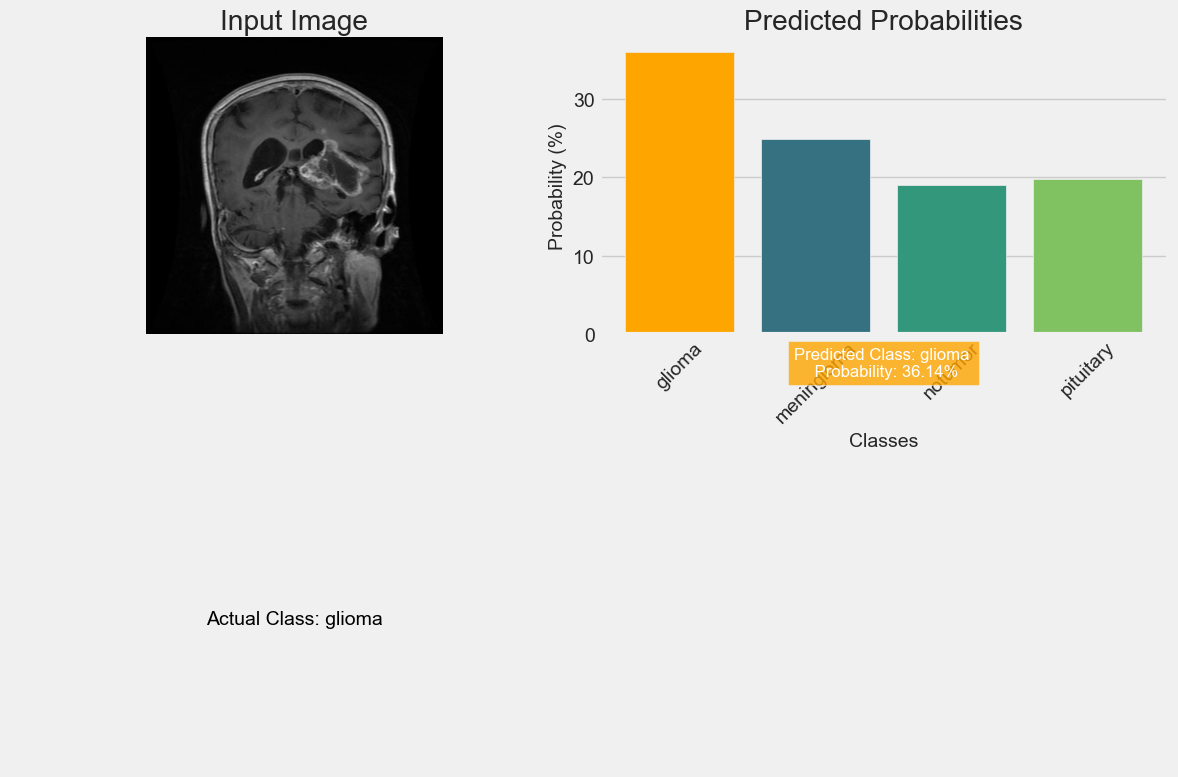

In [164]:

# Path to the "Testing" folder containing subfolders with images
testing_folder_path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/'

# Get a list of subfolders (each subfolder corresponds to a class)
subfolders = [f.path for f in os.scandir(testing_folder_path) if f.is_dir()]

# Randomly select a subfolder
random_subfolder = random.choice(subfolders)

# Get a list of image files in the selected subfolder
image_files = glob.glob(os.path.join(random_subfolder, '*.jpg'))

# Randomly select an image from the subfolder
random_image_path = random.choice(image_files)

# Open the randomly selected image
img = Image.open(random_image_path)

# Convert the image to RGB if it's not already
img = img.convert('RGB')

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = efficientnet_model.predict(iArray)

# Get class labels
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Softmax and class prediction
score = tf.nn.softmax(p[0])
predicted_class = np.argmax(p)

# Actual class (assuming you have the ground truth class label)
actual_class = os.path.basename(random_subfolder)

# Visualization
plt.figure(figsize=(12, 8))

# Display the image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities using seaborn
plt.subplot(2, 2, 2)
sns.barplot(x=cl_labels, y=score.numpy() * 100, palette="viridis")  # Convert to NumPy array and multiply by 100
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability (%)')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class].numpy() * 100, color='orange')

# Annotate the predicted class and its probability on the image
plt.text(0.5, -0.1, f'Predicted Class: {cl_labels[predicted_class]} \n Probability: {score[predicted_class].numpy()*100:.2f}%',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='white', bbox=dict(facecolor='orange', alpha=0.8))

# Display the actual class
plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, f'Actual Class: {actual_class}', ha='center', va='center', fontsize=14, color='black')
plt.axis('off')

plt.tight_layout()
plt.show()


# MobileNetV2 Model

In [177]:
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
import time

#### MobileNetV2 Model Summary

In [182]:

model_temp = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_temp.trainable = False
x = model_temp.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(4, activation='softmax')(x)

model_MobileNetV2 = Model(inputs=model_temp.input, outputs=x)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model_MobileNetV2.compile(loss='categorical_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

model_MobileNetV2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

#### Training MobileNetV2 Model 

In [183]:
t3=time.time()
history_MobileNetV2 = model_MobileNetV2.fit(Train, validation_data=Valid, epochs=50)
model_MobileNetV2.save('MobileNetV2_50epochs')
t4=time.time()
print()
print('The training of 50 epochs of the Transfer Learning model took',round((t4-t3)/60),'minutes.')


Epoch 1/50
286/286 [==============================] - 71s 243ms/step - loss: 0.5293 - accuracy: 0.8095 - val_loss: 0.4950 - val_accuracy: 0.8183
Epoch 2/50
286/286 [==============================] - 73s 255ms/step - loss: 0.3500 - accuracy: 0.8776 - val_loss: 0.4347 - val_accuracy: 0.8412
Epoch 3/50
286/286 [==============================] - 72s 253ms/step - loss: 0.2989 - accuracy: 0.8929 - val_loss: 0.4090 - val_accuracy: 0.8382
Epoch 4/50
286/286 [==============================] - 68s 239ms/step - loss: 0.2731 - accuracy: 0.9011 - val_loss: 0.3237 - val_accuracy: 0.8656
Epoch 5/50
286/286 [==============================] - 68s 236ms/step - loss: 0.2516 - accuracy: 0.9090 - val_loss: 0.3635 - val_accuracy: 0.8580
Epoch 6/50
286/286 [==============================] - 68s 237ms/step - loss: 0.2313 - accuracy: 0.9147 - val_loss: 0.3123 - val_accuracy: 0.8779
Epoch 7/50
286/286 [==============================] - 69s 242ms/step - loss: 0.2195 - accuracy: 0.9202 - val_loss: 0.2756 - val_ac

INFO:tensorflow:Assets written to: MobileNetV2_50epochs/assets


INFO:tensorflow:Assets written to: MobileNetV2_50epochs/assets



The training of 50 epochs of the Transfer Learning model took 59 minutes.


#### Evaluation Metrics for MobileNetV2 Model 

In [185]:
# accuracy and loss of Train

tr_acc = history_MobileNetV2.history['accuracy']
tr_loss = history_MobileNetV2.history['loss']


# accuracy and loss or Valid\

v_acc = history_MobileNetV2.history['val_accuracy']
v_loss = history_MobileNetV2.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

####  Training Epochs and Accuracy

In [186]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0.8095238208770752, 0.8776260614395142, 0.8928571343421936, 0.9010854363441467, 0.9089635610580444, 0.9147409200668335, 0.9201680421829224, 0.9226190447807312, 0.9275209903717041, 0.9264705777168274, 0.9355742335319519, 0.9378501176834106, 0.9385504126548767, 0.9410014152526855, 0.9436274766921997, 0.9427521228790283, 0.9455532431602478, 0.9455532431602478, 0.9473039507865906, 0.9509803652763367, 0.9508053064346313, 0.9530812501907349, 0.9532563090324402, 0.9529061913490295, 0.9555321931838989, 0.9555321931838989, 0.9585084319114685, 0.9578081369400024, 0.9560574293136597, 0.956232488155365, 0.9614846110343933, 0.9602590799331665, 0.9611344337463379, 0.961834728717804, 0.9621848464012146, 0.9658613204956055, 0.9639355540275574, 0.9660364389419556, 0.9656862616539001, 0.9651610851287842, 0.9691876

#### Training and Validation Plots 

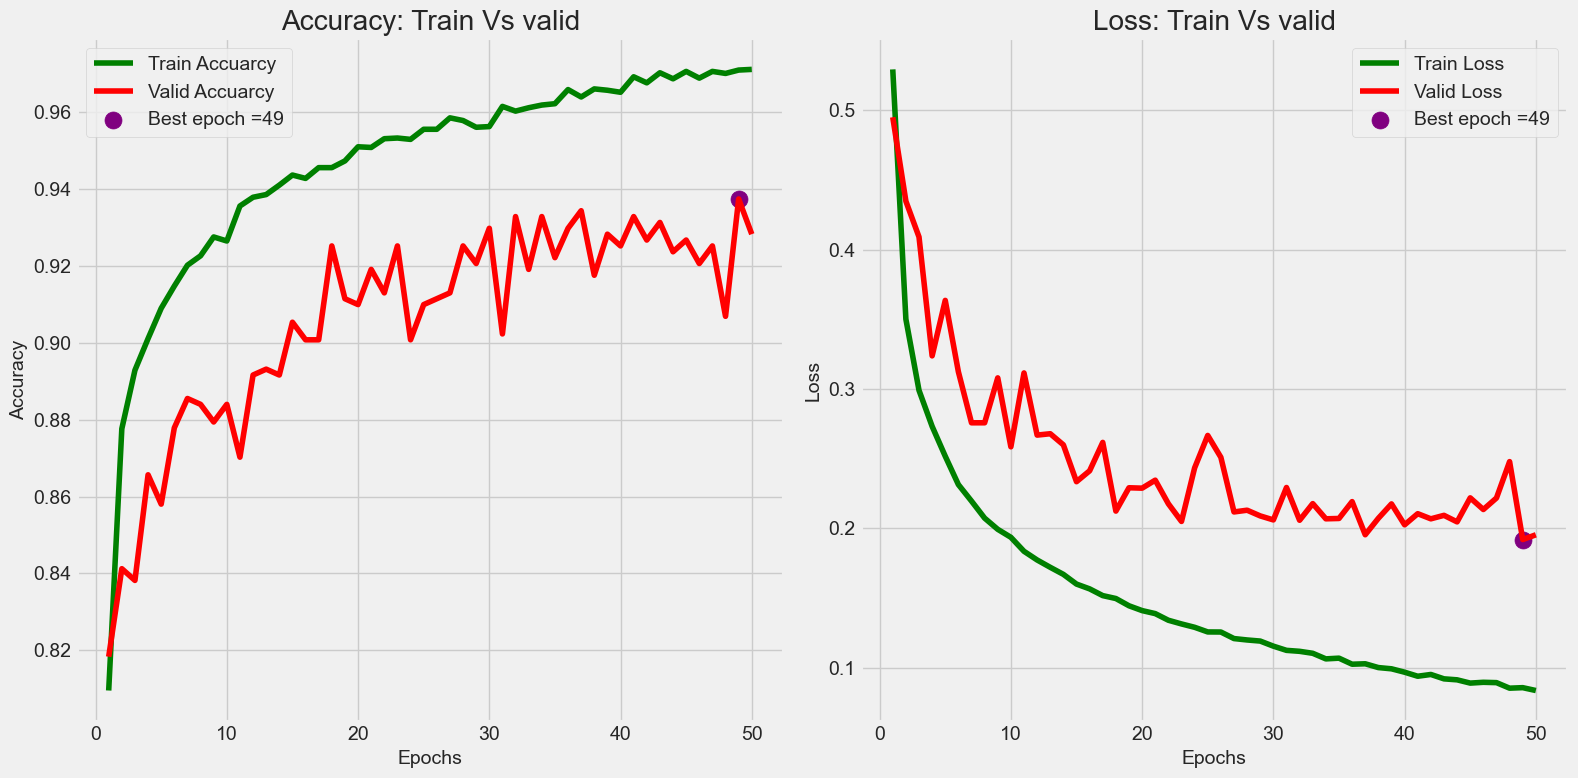

In [187]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Final Training Metrics 

In [189]:
train_acc = history_MobileNetV2.history['accuracy']
val_acc = history_MobileNetV2.history['val_accuracy']
train_loss = history_MobileNetV2.history['loss']
val_loss = history_MobileNetV2.history['val_loss']
print('Training Accuracy:', train_acc[-1])
print('Training Loss:', train_loss[-1])

Training Accuracy: 0.9711134433746338
Training Loss: 0.0834784135222435


#### Final Training Metrics 

In [190]:
print('Validation Accuracy:', val_acc[-1])
print('Validation Loss:', val_loss[-1])

Validation Accuracy: 0.9282442927360535
Validation Loss: 0.19525131583213806


#### Evaluation Metrics on Test Set 

In [191]:
Test_sc =model_MobileNetV2.evaluate(Test, verbose = 0)

In [192]:
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Test Scores : 
    accuracy: 0.9146341681480408 
      Loss:  0.25604069232940674 
________________________


#### Test Set Predictions and Evaluation 

In [193]:
predictions = model_MobileNetV2.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[3.5995764e-13 1.8925667e-11 1.0000000e+00 1.8610289e-12]
 [9.8697621e-01 5.1040058e-03 1.3725354e-06 7.9184882e-03]
 [4.9263006e-04 9.9909937e-01 6.0137580e-05 3.4791106e-04]
 ...
 [6.1990157e-10 4.1657758e-01 5.8342248e-01 2.7738206e-10]
 [2.1613941e-05 4.6786779e-04 1.0239429e-04 9.9940813e-01]
 [9.9984884e-01 1.4897020e-04 2.0943212e-06 2.7127676e-09]]
[2 0 1 3 2 0 1 1 2 1 1 2 0 0 0 0 2 0 1 2 1 3 3 3 1 2 3 1 3 2 3 3 2 2 0 3 1
 1 1 3 3 2 2 1 0 0 0 2 2 1 3 2 2 0 3 0 2 1 3 2 1 2 2 2 2 1 0 2 1 2 3 1 3 1
 1 3 2 2 1 0 0 2 2 2 0 3 1 1 0 2 0 3 0 3 0 0 0 1 2 2 3 2 2 1 0 2 3 0 2 2 3
 0 1 3 2 2 2 0 1 0 0 2 0 2 3 2 1 3 3 2 3 0 3 2 1 3 0 0 0 1 2 2 3 0 3 1 0 1
 0 0 3 3 0 2 2 3 2 2 2 3 2 3 2 3 0 0 1 1 3 3 3 3 1 3 3 2 3 1 1 1 1 3 3 3 0
 1 3 3 2 3 1 3 0 1 2 2 3 3 3 0 3 2 1 2 1 3 3 2 3 3 1 0 3 2 2 3 2 2 2 0 3 0
 2 2 1 2 3 3 3 1 1 0 1 2 1 2 0 0 2 2 3 2 2 3 3 0 2 0 2 2 1 2 0 0 0 0 1 3 2
 3 2 3 0 0 0 3 0 2 0 1 3 3 2 3 1 2 2 2 0 1 1 0 0 2 0 1 1 3 0 1 2 3 0 0 2 3
 1 2 0 1 1 2 1 2 1 2 3 0 2 1 1 2 0 1 2 2

#### Confusion Matrix 

In [194]:
# Use n. of keys of  Class indices to create confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[122,  17,   0,   0],
       [ 17, 121,   6,   9],
       [  0,   0, 200,   0],
       [  4,   3,   0, 157]])

#### Visualise it


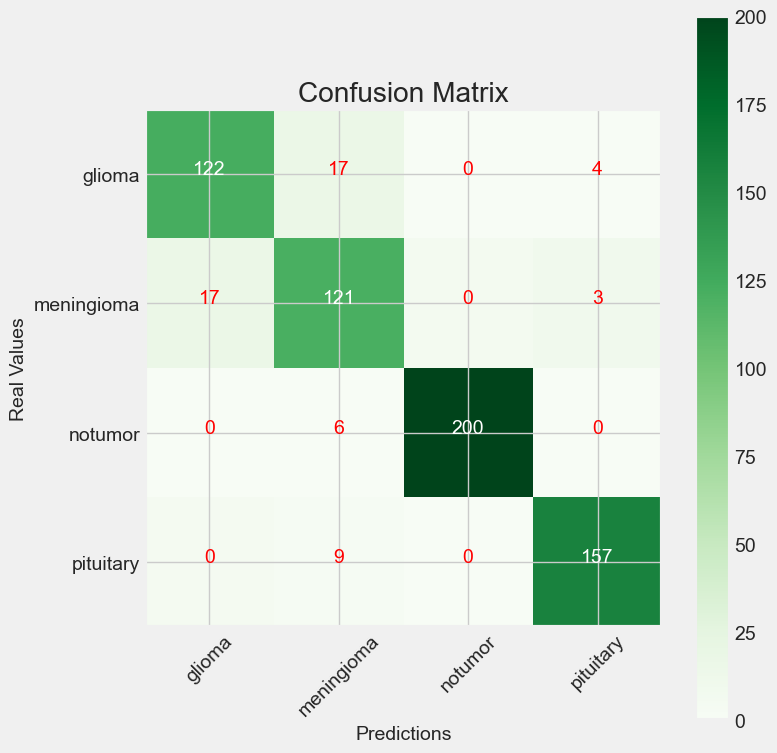

In [195]:
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()             

####  Classification Report 

In [196]:
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.85      0.88      0.87       139
  meningioma       0.86      0.79      0.82       153
     notumor       0.97      1.00      0.99       200
   pituitary       0.95      0.96      0.95       164

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



#### Save MobileNetV2 Model

In [197]:
model_MobileNetV2.save('model_MobileNetV2.h5')

#### Compile MobileNetV2 Model

In [198]:
model_MobileNetV2 = tf.keras.models.load_model("/Users/rabhaembarak/Downloads/efficientnet_model.h5", compile = False)
model_MobileNetV2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#### Load Image, Preprocess, and Make Predictions with MobileNetV2 Model

In [199]:
from PIL import Image
import tensorflow as tf
import numpy as np

# image path
path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/meningioma/Te-meTr_0001.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = model_MobileNetV2.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f'-------------------------\nClass whose max ratio: \n\n{cl_labels[np.argmax(p)]}')

1/1 [==============================] - 1s 979ms/step

Predictions of given image:  

 tf.Tensor([0.36868548 0.23781213 0.19272342 0.20077893], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

glioma


#### Visualization of Predictions on a Single Image with MobileNetV2

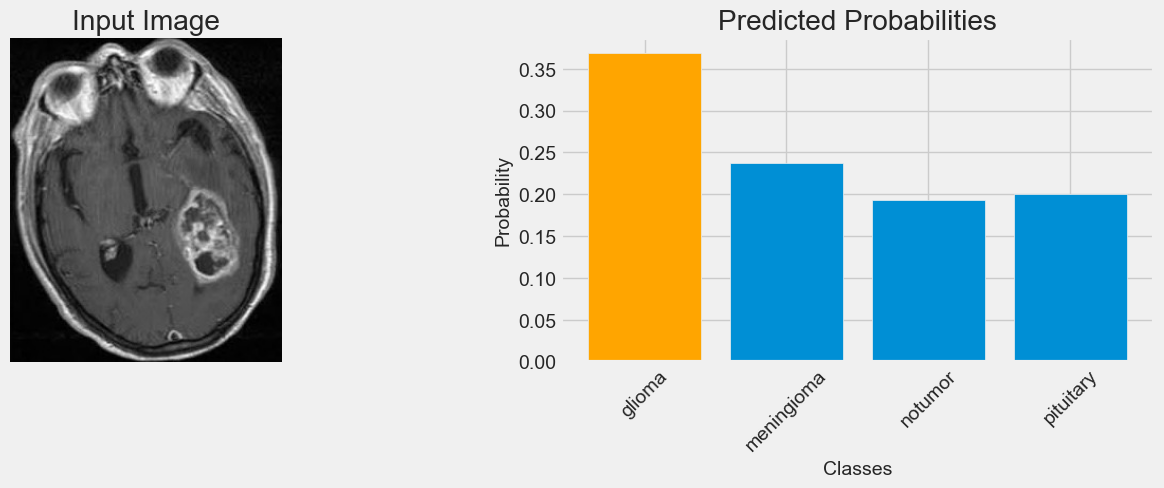

Predicted Class: glioma


In [200]:

# Softmax and class prediction
predicted_class = np.argmax(p)

# Visualization
plt.figure(figsize=(15, 4))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities
plt.subplot(1, 2, 2)
plt.bar(cl_labels, score)
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class], color='orange')

plt.show()

# Print predicted class
print(f'Predicted Class: {cl_labels[predicted_class]}')


#### Random Image Prediction and Visualization with MobileNetV2

1/1 [==============================] - 0s 34ms/step


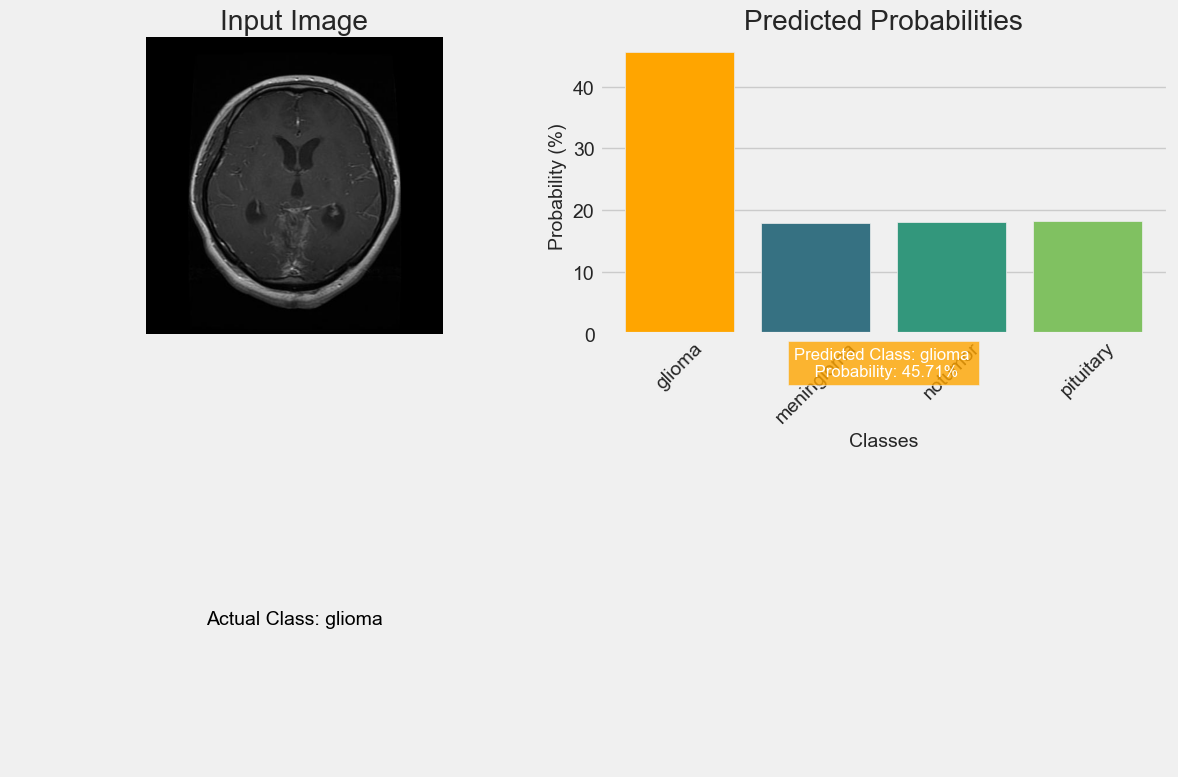

In [209]:

# Path to the "Testing" folder containing subfolders with images
testing_folder_path = '/Users/rabhaembarak/Downloads/Brain_Tumor_MRI_Dataset/Testing/'

# Get a list of subfolders (each subfolder corresponds to a class)
subfolders = [f.path for f in os.scandir(testing_folder_path) if f.is_dir()]

# Randomly select a subfolder
random_subfolder = random.choice(subfolders)

# Get a list of image files in the selected subfolder
image_files = glob.glob(os.path.join(random_subfolder, '*.jpg'))

# Randomly select an image from the subfolder
random_image_path = random.choice(image_files)

# Open the randomly selected image
img = Image.open(random_image_path)

# Convert the image to RGB if it's not already
img = img.convert('RGB')

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Predictions ratio for each class
p = model_MobileNetV2.predict(iArray)

# Get class labels
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Softmax and class prediction
score = tf.nn.softmax(p[0])
predicted_class = np.argmax(p)

# Actual class (assuming you have the ground truth class label)
actual_class = os.path.basename(random_subfolder)

# Visualization
plt.figure(figsize=(12, 8))

# Display the image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')

# Bar chart for predicted probabilities using seaborn
plt.subplot(2, 2, 2)
sns.barplot(x=cl_labels, y=score.numpy() * 100, palette="viridis")  # Convert to NumPy array and multiply by 100
plt.title('Predicted Probabilities')
plt.xlabel('Classes')
plt.ylabel('Probability (%)')

# Highlight the predicted class
plt.xticks(rotation=45)
plt.bar(cl_labels[predicted_class], score[predicted_class].numpy() * 100, color='orange')

# Annotate the predicted class and its probability on the image
plt.text(0.5, -0.1, f'Predicted Class: {cl_labels[predicted_class]} \n Probability: {score[predicted_class].numpy()*100:.2f}%',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='white', bbox=dict(facecolor='orange', alpha=0.8))

# Display the actual class
plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, f'Actual Class: {actual_class}', ha='center', va='center', fontsize=14, color='black')
plt.axis('off')

plt.tight_layout()
plt.show()


# Models Evaluation Summary

In [226]:
import pandas as pd
from tabulate import tabulate

In [230]:
import pandas as pd
from tabulate import tabulate

# Data for CNN
data_cnn = {
    'Model': ['CNN'],
    'Accuracy': [0.97],
    'Precision': [0.97],
    'Recall': [0.97],
    'F1-Score': [0.97]
}

# Data for EfficientNet
data_efficientnet = {
    'Model': ['EfficientNetV2B0'],
    'Accuracy': [0.82],
    'Precision': [0.84],
    'Recall': [0.81],
    'F1-Score': [0.81]
}

# Data for MobileNet
data_mobilenet = {
    'Model': ['MobileNetV2'],
    'Accuracy': [0.91],
    'Precision': [0.91],
    'Recall': [0.91],
    'F1-Score': [0.91]
}

# Create DataFrames
df_cnn = pd.DataFrame(data_cnn)
df_efficientnet = pd.DataFrame(data_efficientnet)
df_mobilenet = pd.DataFrame(data_mobilenet)

# Concatenate DataFrames
df_combined = pd.concat([df_cnn, df_efficientnet, df_mobilenet], ignore_index=True)
table = tabulate(df_combined, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)


╒══════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model            │   Accuracy │   Precision │   Recall │   F1-Score │
╞══════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ CNN              │       0.97 │        0.97 │     0.97 │       0.97 │
├──────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ EfficientNetV2B0 │       0.82 │        0.84 │     0.81 │       0.81 │
├──────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ MobileNetV2      │       0.91 │        0.91 │     0.91 │       0.91 │
╘══════════════════╧════════════╧═════════════╧══════════╧════════════╛
